## 第三至四周作业

#### 提交人学号：10235501454
#### 提交人姓名：陈子谦

#### 作业题目：
    假定二维随机向量(X1,X2)服从二维正态分布N(μ1,μ2,σ1,σ2,p)。
    考虑以下九种情况:（略） 
    任务一:在同一个图片中划分出九宫格。在每个格子中，绘制某种情况下(X1,X2)'的密度函数的等高线。(请明确地标记出每张图所对应的情况)
    任务二:评述你从所绘制的图中观测到的结果。
    任务三(附加题):请你针对二维正态分布的五个参数提出一些猜想，并能够通过合理的方式(如可视化或者实验)进行论证该猜想是否正确?

第一题直接使用Python中scipy.stats模块的norm.ppf函数，就可以计算标准正态分布的分位数

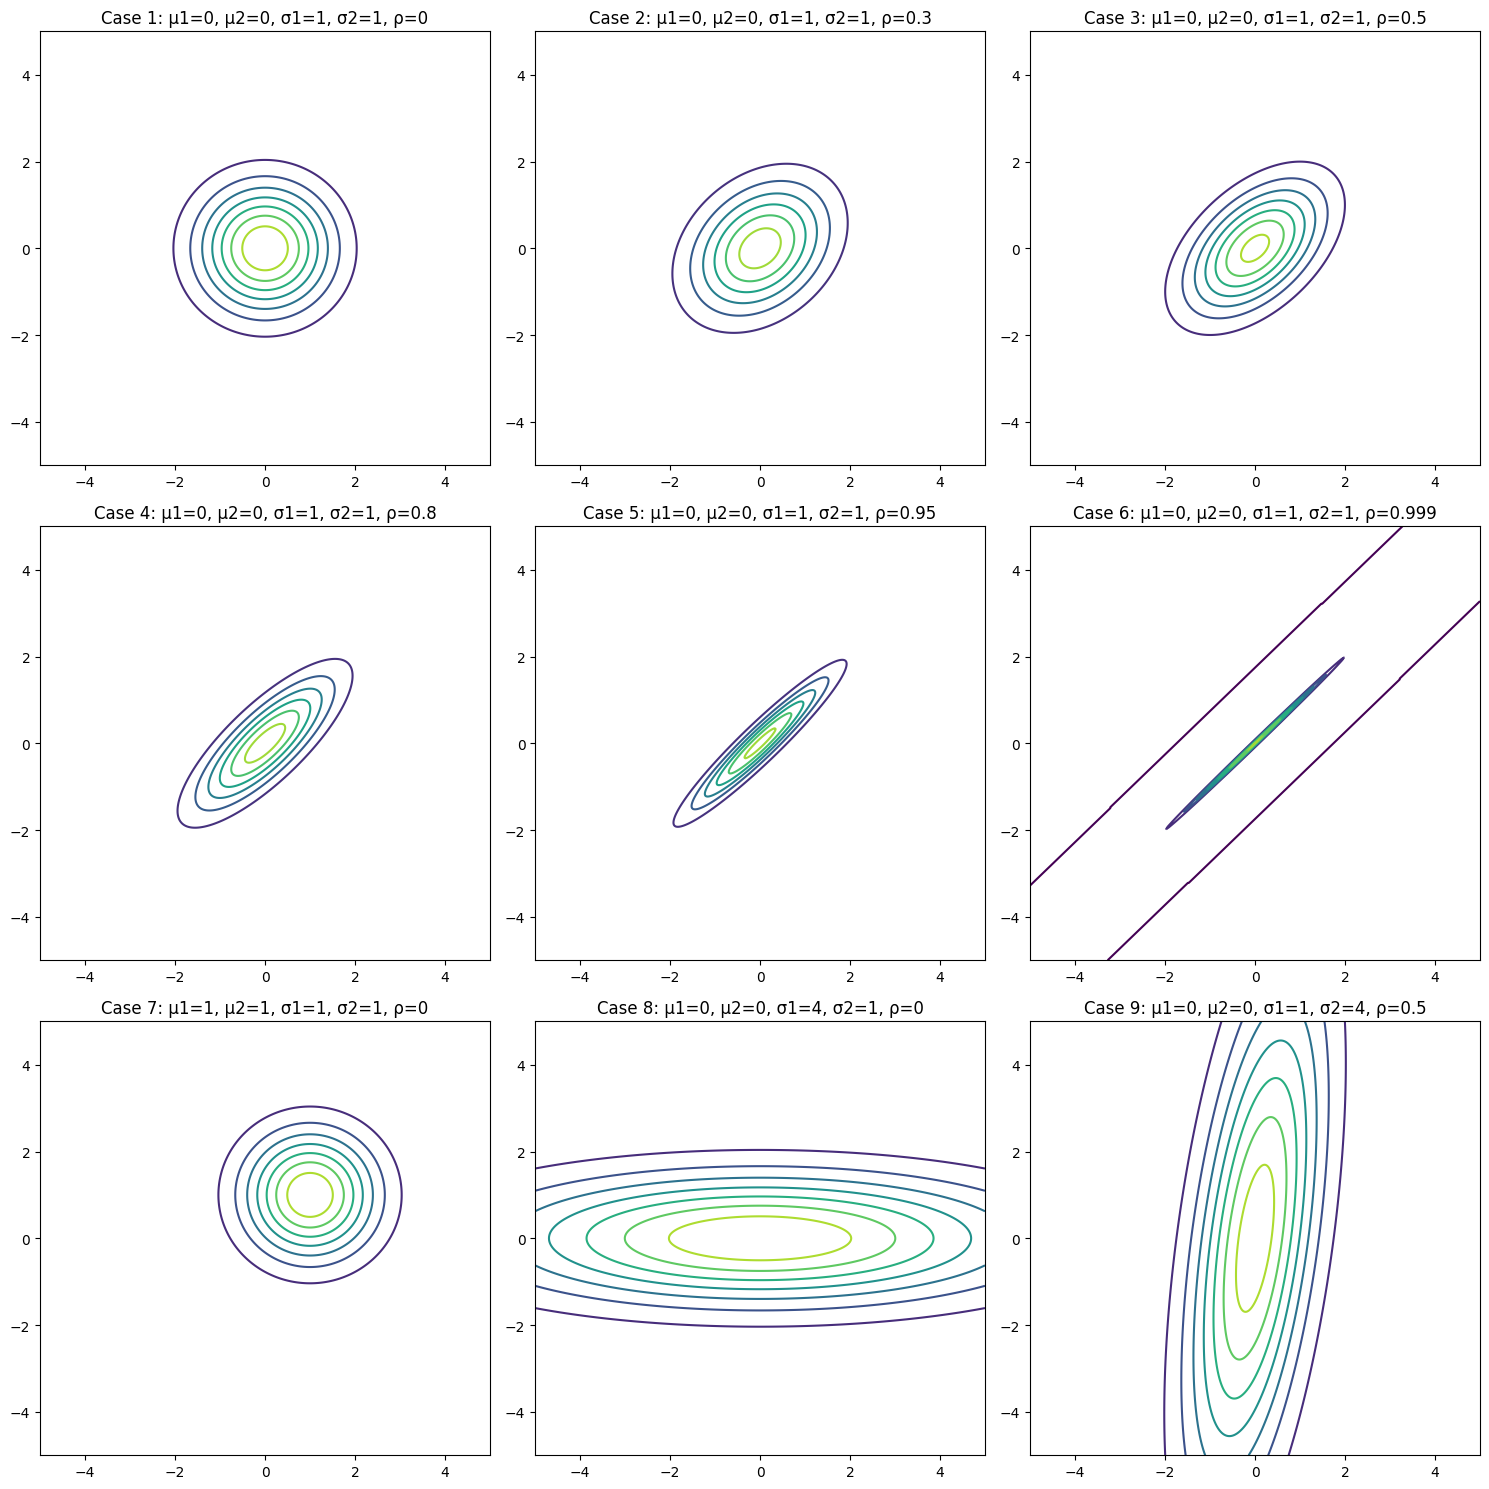

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# 定义九种情况的参数
params = [
    (0, 0, 1, 1, 0),
    (0, 0, 1, 1, 0.3),
    (0, 0, 1, 1, 0.5),
    (0, 0, 1, 1, 0.8),
    (0, 0, 1, 1, 0.95),
    (0, 0, 1, 1, 0.999),
    (1, 1, 1, 1, 0),
    (0, 0, 4, 1, 0),
    (0, 0, 1, 4, 0.5)
]

# 创建一个图和九个子图
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# 绘制每个分布的等高线
for i, (mu1, mu2, sigma1, sigma2, rho) in enumerate(params):
    # 计算协方差矩阵
    cov_matrix = [[sigma1**2, rho*sigma1*sigma2], [rho*sigma1*sigma2, sigma2**2]]
    # 创建一个多元正态分布
    rv = multivariate_normal([mu1, mu2], cov_matrix)
    
    # 创建网格和边界
    x = np.linspace(-5, 5, 500)
    y = np.linspace(-5, 5, 500)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    
    # 绘制等高线
    ax = axes[i//3, i%3]
    ax.contour(X, Y, rv.pdf(pos))
    ax.set_title(f'Case {i+1}: μ1={mu1}, μ2={mu2}, σ={sigma1}, σ2={sigma2}, ρ={rho}')

plt.tight_layout()
plt.show()


 ##### 任务二：从绘制的九宫格图中，可以观察到不同的相关系数ρ如何影响两个随机变量之间的关系。
    当ρ=0时，两个变量是独立的，等高线呈圆形或椭圆形（值得一提的是，σ的差值影响着等高线椭圆形的弯曲程度，差值越大，椭圆越窄，表示σ大的一方对整体图像的影响程度越大）。
    随着ρ的增加，等高线变得更加倾斜，表明两个变量之间的正相关性增强。当ρ接近1或-1时（如图6，ρ=0.999时），等高线变得非常窄，表明两个变量几乎完全正相关或负相关。

#### 任务三（附加题）： 对于二维正态分布的五个参数（μ1, μ2, σ1, σ2, ρ），我们可以提出以下猜想：
    1.μ1和μ2决定了分布的中心位置。
    2.σ1和σ2决定了分布在各自轴向的扩散程度。
    3.ρ决定了两个变量之间的相关性。

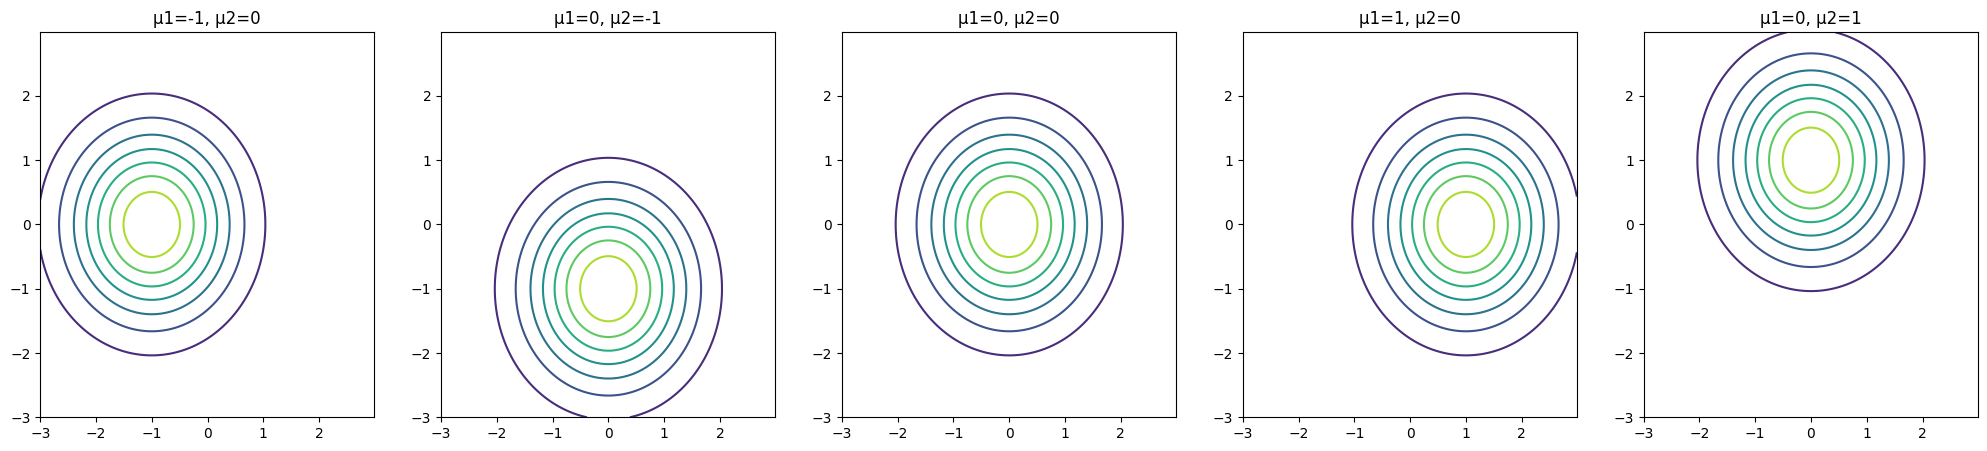

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# 参数设置
mu_params = [(-1,0),(0,-1), (0, 0), (1, 0), (0, 1)]
sigma1, sigma2, rho = 1, 1, 0

# 绘制图形
plt.figure(figsize=(25, 5))
for i, (mu1, mu2) in enumerate(mu_params):
    rv = multivariate_normal([mu1, mu2], [[sigma1**2, rho], [rho, sigma2**2]])
    x, y = np.mgrid[-3:3:.01, -3:3:.01]
    pos = np.dstack((x, y))
    plt.subplot(1, 5, i+1)
    plt.contour(x, y, rv.pdf(pos))
    plt.title(f'μ1={mu1}, μ2={mu2}')
plt.show()


##### 首先我们来验证猜想1：
    我们令μ1, μ2分别等于[(-1,0),(0,-1), (0, 0), (1, 0), (0, 1)]五组数据，观察其对应等高线图
    从图中可以看出μ1, μ2分别控制着对应的轴线移动，当我们改变μ1和μ2时，等高线图的中心位置随之移动。
    例如，当μ1和μ2从(0, 0)变为(1, 0)/(0, 1)时，分布的中心从原点移动到了坐标(1, 0)/(0, 1)的位置。这表明μ1和μ2确实控制着分布的中心位置。

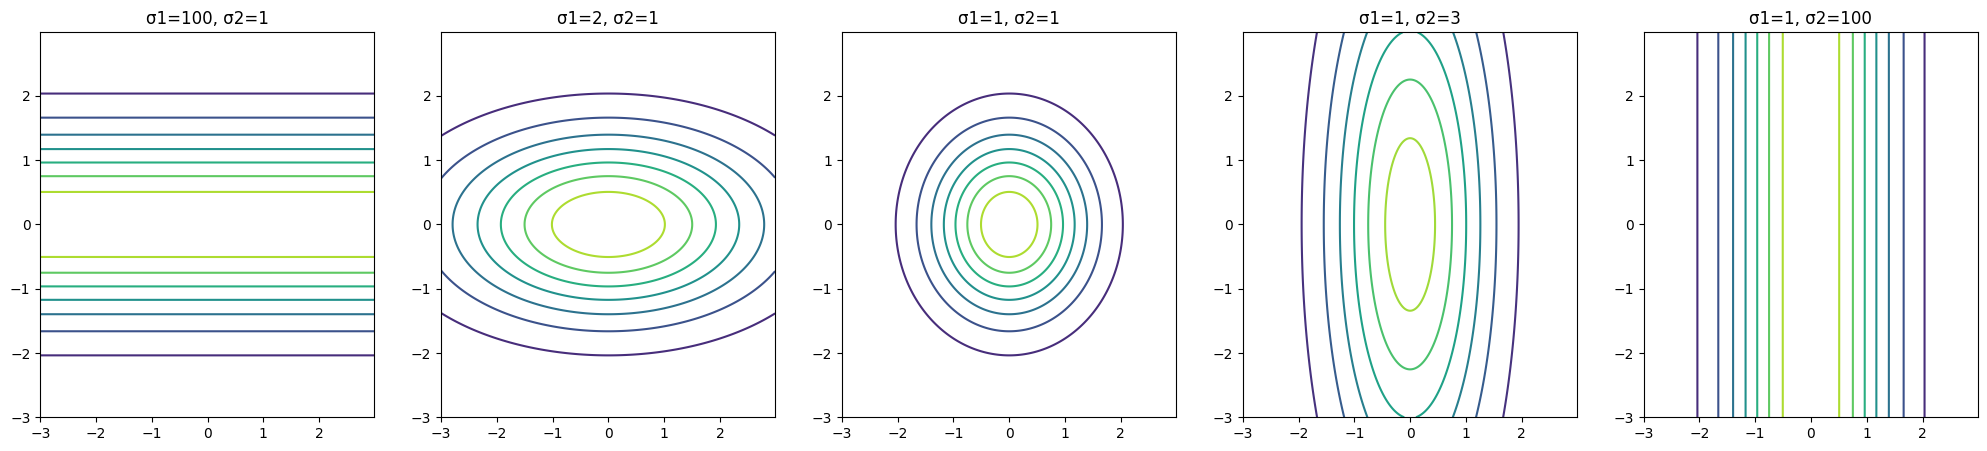

In [18]:
# 参数设置
mu1, mu2, rho = 0, 0, 0
sigma_params = [(100,1), (2, 1), (1, 1), (1, 3),(1,100)]

# 绘制图形
plt.figure(figsize=(25, 5))
for i, (sigma1, sigma2) in enumerate(sigma_params):
    rv = multivariate_normal([mu1, mu2], [[sigma1**2, rho], [rho, sigma2**2]])
    x, y = np.mgrid[-3:3:.01, -3:3:.01]
    pos = np.dstack((x, y))
    plt.subplot(1, 5, i+1)
    plt.contour(x, y, rv.pdf(pos))
    plt.title(f'σ1={sigma1}, σ2={sigma2}')
plt.show()


##### 接着我们来验证猜想2：
    我们推测，改变σ1和σ2的值会影响等高线图的宽度和高度（假设我们令x轴表示宽度，y轴表示高度），即分布在X1和X2轴向的扩散程度。
    σ1较大时，等高线在X1轴方向上更宽，表明X1的变异性增加；σ2较大时，等高线在X2轴方向上更高，表明X2的变异性增加。
    例如从实验图中可以看出，当σ1从1变为2时，图像在x轴上的扩散程度增加，同理当σ2从1变为3时，图像在y轴上的扩散程度增加，且扩散程度比σ1要大

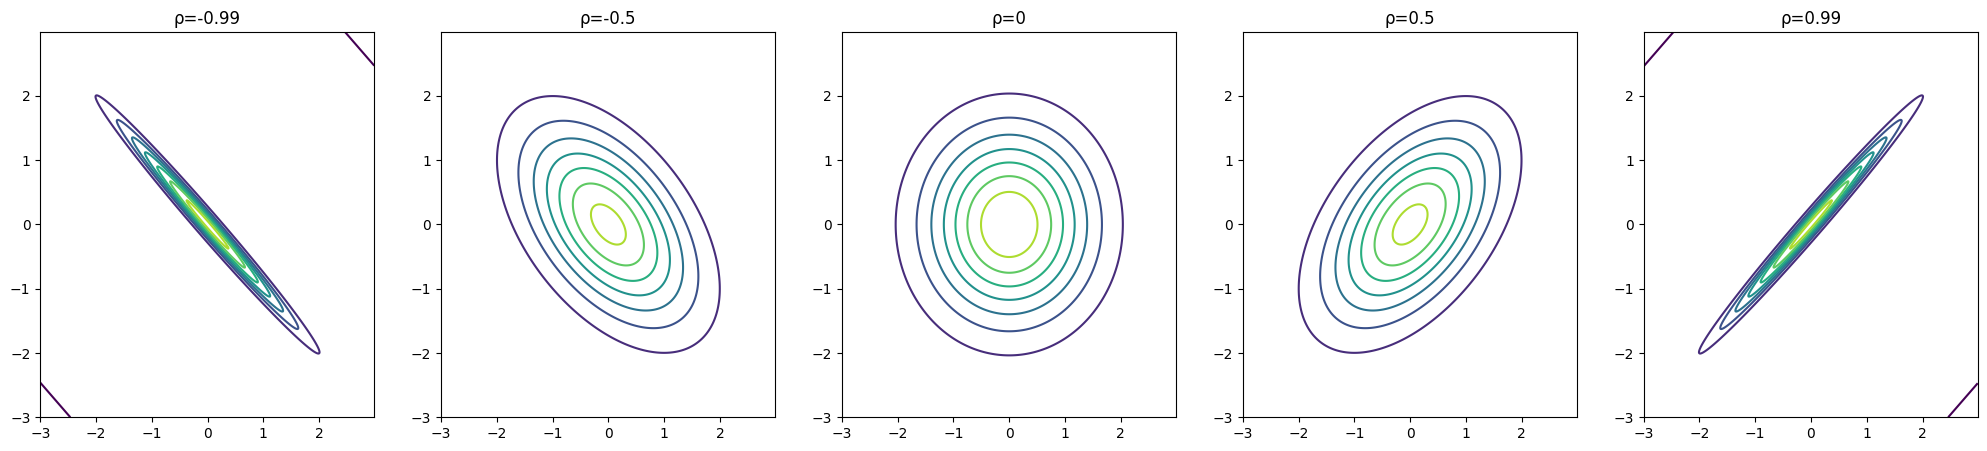

In [19]:
# 参数设置
mu1, mu2 = 0, 0
sigma1, sigma2 = 1, 1
rho_params = [-0.99,-0.5, 0, 0.5,0.99]

# 绘制图形
plt.figure(figsize=(25, 5))
for i, rho in enumerate(rho_params):
    rv = multivariate_normal([mu1, mu2], [[sigma1**2, rho*sigma1*sigma2], [rho*sigma1*sigma2, sigma2**2]])
    x, y = np.mgrid[-3:3:.01, -3:3:.01]
    pos = np.dstack((x, y))
    plt.subplot(1, 5, i+1)
    plt.contour(x, y, rv.pdf(pos))
    plt.title(f'ρ={rho}')
plt.show()


##### 最后我们来验证猜想3：
    当ρ的值变化时，等高线图的倾斜程度也随之变化。ρ为0时，等高线图呈圆形或椭圆形，表明X1和X2是独立的。
    ρ为正值时，等高线图向y=x方向倾斜，表明X1和X2正相关；ρ为负值时，等高线图向y=-x方向倾斜，表明X1和X2负相关。
    ρ接近1或-1时，等高线图变得非常窄，表明两个变量几乎完全正相关或负相关。